In [ ]:
# This program attempts to optimize a users portfolio using the efficient frontier

In [ ]:
pip install yfinance

In [ ]:
# import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web
from datetime import datetime as dt
import yfinance as yf
plt.style.use('fivethirtyeight')


In [ ]:
# Get the stock symbols/tickers in the portfolio
# FAANG
assets = ['META', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

In [ ]:
# Assign weights to the stocks
weights=np.array([0.2,0.2,0.2,0.2,0.2])

In [ ]:
# Get the stocks/portfolio start date and end date
stockStartDate='2013-01-01'

In [ ]:
today= dt.today().strftime('%Y-%m-%d')
today

'2025-06-19'

In [ ]:
#  Create a dataframe to store the adjusted close price of the stocks
df=pd.DataFrame()

# Store the adjust close price of the stock into the dataframe
for stock in assets:
  df[stock] = yf.download(stock, start=stockStartDate, end=today, auto_adjust=False)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Show the df
df

,META,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,27.847229,12.865500,16.647190,13.144286,17.907284
2013-01-03,27.618484,12.924000,16.437065,13.798571,17.917685
2013-01-04,28.603083,12.957500,15.979208,13.711429,18.271746
2013-01-07,29.259480,13.423000,15.885212,14.171429,18.192020
2013-01-08,28.901443,13.319000,15.927968,13.880000,18.156118
...,...,...,...,...,...
2025-06-12,692.826904,213.240005,199.199997,1215.030029,176.970001
2025-06-13,682.344971,212.100006,196.449997,1212.150024,175.880005
2025-06-16,702.119995,216.100006,198.419998,1225.349976,177.940002


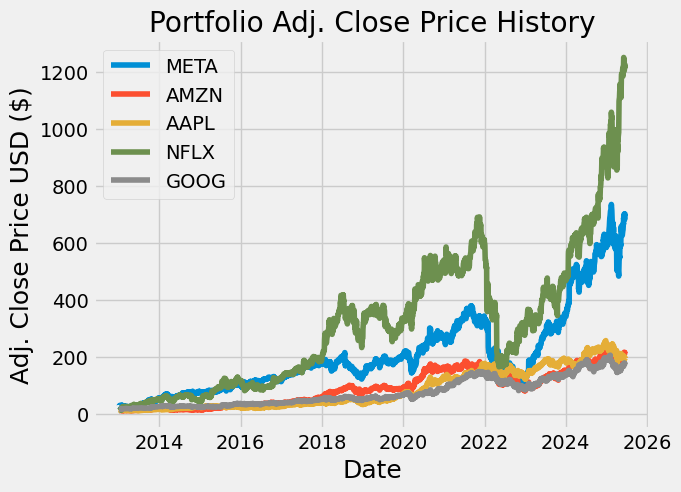

In [ ]:
# Visualise stock/portfolio
title = 'Portfolio Adj. Close Price History'
my_stocks=df
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label=c)
plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj. Close Price USD ($)', fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [ ]:
# Show daily simple returns
returns=df.pct_change()
returns

,META,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022948,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974
...,...,...,...,...,...
2025-06-12,-0.001124,0.000188,0.002113,-0.003976,-0.010179
2025-06-13,-0.015129,-0.005346,-0.013805,-0.002370,-0.006159
2025-06-16,0.028981,0.018859,0.010028,0.010890,0.011713


In [ ]:
# Create and show annualized covariance matrix, direction of relationship between two asset prices, 252=number of trading days
cov_matrix_annual=returns.cov()*252
cov_matrix_annual

,META,AMZN,AAPL,NFLX,GOOG
META,0.147338,0.070545,0.052195,0.070312,0.062224
AMZN,0.070545,0.105935,0.046861,0.069099,0.056645
AAPL,0.052195,0.046861,0.081698,0.041758,0.043874
NFLX,0.070312,0.069099,0.041758,0.206618,0.052209
GOOG,0.062224,0.056645,0.043874,0.052209,0.077337


In [ ]:
# Calculate the portfolio variance
port_variance=np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

np.float64(0.07001473051996626)

In [ ]:
# Calculate portfolio volatility (std deviation=sqrt of var)
port_volatility=np.sqrt(port_variance)
port_volatility

np.float64(0.26460296770816133)

In [ ]:
# Calculate annual portfolio return
portfolioSimpleAnnualReturn=np.sum(returns.mean()*weights)*252
portfolioSimpleAnnualReturn

np.float64(0.3077935090583928)

In [ ]:
# Show expected annual return, volatility (risk) and variance
percent_var=str(round(port_variance,2)*100)+'%'
percent_vol=str(round(port_volatility,2)*100)+'%'
percent_ret=str(round(portfolioSimpleAnnualReturn,2)*100)+'%'

print('Expected annual return: '+percent_ret)
print('Annual volatility/risk: '+percent_vol)
print('Annual variance: '+percent_var)

Expected annual return: 31.0%
Annual volatility/risk: 26.0%
Annual variance: 7.000000000000001%


In [ ]:
pip install pyPortfolioOpt

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


In [ ]:
# Portfolio Optimization
# Calculate the expected returns and the annualised sample cov matrix of asset returns
mu=expected_returns.mean_historical_return(df)
S=risk_models.sample_cov(df)

# Optimise for max sharpe ratio, measures the performance of a investment comapred to an investment thats risk free
ef=EfficientFrontier(mu,S)
weights=ef.max_sharpe()
cleaned_weights=ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('META', 0.16023), ('AMZN', 0.10242), ('AAPL', 0.32502), ('NFLX', 0.39278), ('GOOG', 0.01955)])
Expected annual return: 32.1%
Annual volatility: 28.9%
Sharpe Ratio: 1.11


(np.float64(0.3212384837854432),
 np.float64(0.28870297661599204),
 np.float64(1.1126954337319739))

In [ ]:
# Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices=get_latest_prices(df)
weights=cleaned_weights
da=DiscreteAllocation(weights, latest_prices, total_portfolio_value=15000)

allocation, leftover=da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation: {'META': 3, 'AMZN': 7, 'AAPL': 25, 'NFLX': 5, 'GOOG': 2}
Funds remaining: $51.14
